In [5]:
import pandas as pd
#from google.colab import drive
#drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression


In [6]:
path_to_data = "./basketball"

In [7]:
college = pd.read_csv(path_to_data + "/college.csv")
standings = pd.read_csv(path_to_data + "/2012-18_standings.csv")
player_box = pd.read_csv(path_to_data + "/2012-18_playerBoxScore.csv")

# **EDA Phase**

# EDA Visualization 1: Player Improvement

In [8]:
from_2012_has_ncaa = college[college["active_to"]>=2012]
from_2012_has_ncaa = from_2012_has_ncaa[from_2012_has_ncaa["NCAA_ppg"].notnull() &
                                        from_2012_has_ncaa["NCAA_fgpct"].notnull()
                                       ]
from_2012_has_ncaa = from_2012_has_ncaa[(from_2012_has_ncaa["NBA_g_played"]>=10)]
from_2012_has_ncaa = from_2012_has_ncaa[(from_2012_has_ncaa["NCAA_games"]>=10)]

only_f = from_2012_has_ncaa[(from_2012_has_ncaa["position"]=="F-G")
                            |(from_2012_has_ncaa["position"]=="F")
                              |(from_2012_has_ncaa["position"]=="F-C")]

Text(0, 0.5, 'NBA Points per Game')

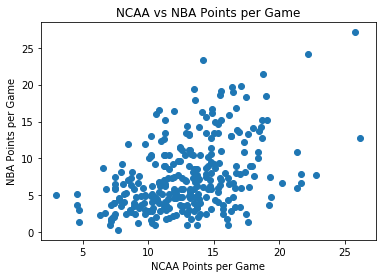

In [9]:
plt.scatter(x=only_f["NCAA_ppg"], y=only_f["NBA_ppg"])
plt.title('NCAA vs NBA Points per Game')
plt.xlabel("NCAA Points per Game")
plt.ylabel("NBA Points per Game")
#here is a plot of a player's college ppg vs nba ppg 

Text(0, 0.5, 'NBA Field Goal %')

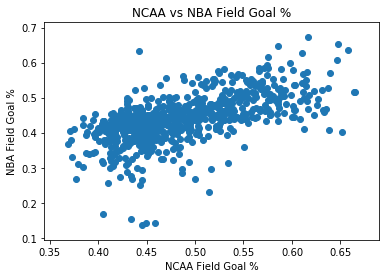

In [10]:
plt.scatter(x=from_2012_has_ncaa["NCAA_fgpct"], y=from_2012_has_ncaa["NBA_fg%"])
plt.title('NCAA vs NBA Field Goal %')
plt.xlabel("NCAA Field Goal %")
plt.ylabel("NBA Field Goal %")

Text(0, 0.5, 'NBA Field Goal % * PPG')

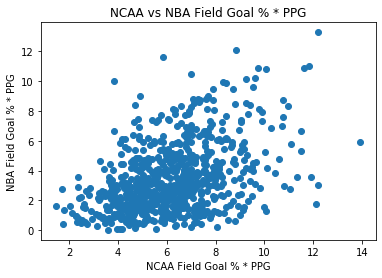

In [11]:
plt.scatter(x=from_2012_has_ncaa["NCAA_ppg"]*from_2012_has_ncaa["NCAA_fgpct"], y=from_2012_has_ncaa["NBA_ppg"]*from_2012_has_ncaa["NBA_fg%"])
plt.title('NCAA vs NBA Field Goal % * PPG')
plt.xlabel("NCAA Field Goal % * PPG")
plt.ylabel("NBA Field Goal % * PPG")

Text(0, 0.5, 'FG% Improvement * 100')

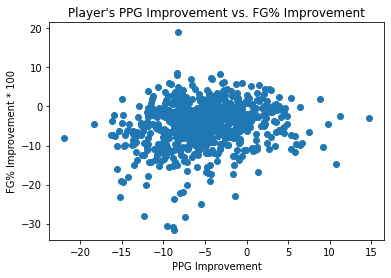

In [12]:
ppg_improvement = from_2012_has_ncaa["NBA_ppg"] - from_2012_has_ncaa["NCAA_ppg"]
fg_improvement = from_2012_has_ncaa["NBA_fg%"] - from_2012_has_ncaa["NCAA_fgpct"]

plt.scatter(x = ppg_improvement, y=fg_improvement*100)
plt.title('Player\'s PPG Improvement vs. FG% Improvement')
plt.xlabel("PPG Improvement")
plt.ylabel("FG% Improvement * 100")

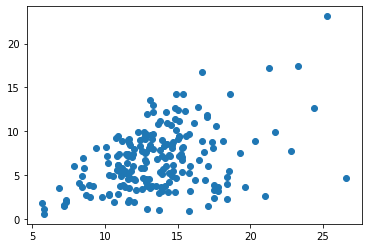

In [13]:
groupmeancollege = from_2012_has_ncaa.groupby("college").mean().sort_values("college", ascending=False)
plt.scatter(x=groupmeancollege["NCAA_ppg"], y=groupmeancollege["NBA_ppg"])

# EDA Visualization 2: Team Improvement

In [14]:
standings['stDate'] = standings['stDate'].astype('datetime64[ns]') 
player_box['gmDate'] = player_box['gmDate'].astype('datetime64[ns]') 
final_standings = standings[standings["gameWon"] + standings["gameLost"] == 82]
final_standings
#Filtering so we only look at end of NBA season standings

,stDate,teamAbbr,rank,rankOrd,gameWon,gameLost,stk,stkType,stkTot,gameBack,...,rel%Indx,mov,srs,pw%,pyth%13.91,wpyth13.91,lpyth13.91,pyth%16.5,wpyth16.5,lpyth16.5
4860,2013-04-17,ATL,6,6th,44,38,L2,loss,2,22.0,...,0.502800,0.4024,-0.0891,0.5132,0.5143,42.1726,39.8274,0.5170,42.3940,39.6060
4861,2013-04-17,BKN,4,4th,49,33,W2,win,2,17.0,...,0.517575,1.7805,1.2896,0.5586,0.5642,46.2644,35.7356,0.5759,47.2238,34.7762
4863,2013-04-17,CHA,14,14th,21,61,W3,win,3,45.0,...,0.436525,-9.2317,-9.7284,0.1960,0.2124,17.4168,64.5832,0.1744,14.3008,67.6992
4864,2013-04-17,CHI,5,5th,45,37,W2,win,2,21.0,...,0.508275,0.3171,-0.1777,0.5104,0.5119,41.9758,40.0242,0.5141,42.1562,39.8438
4865,2013-04-17,CLE,13,13th,24,58,L6,loss,6,42.0,...,0.446125,-4.6829,-5.1802,0.3458,0.3409,27.9538,54.0462,0.3139,25.7398,56.2602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29515,2018-04-11,SA,7,7th,47,35,L1,loss,1,18.0,...,0.518525,2.8902,2.3899,0.5952,0.5980,49.0360,32.9640,0.6156,50.4792,31.5208
29516,2018-04-11,SAC,12,12th,27,55,W1,win,1,38.0,...,0.460225,-6.9878,-7.4917,0.2699,0.2788,22.8616,59.1384,0.2447,20.0654,61.9346
29517,2018-04-11,TOR,1,1st,59,23,L1,loss,1,0.0,...,0.550275,7.7439,7.2500,0.7550,0.7311,59.9502,22.0498,0.7661,62.8202,19.1798
29518,2018-04-11,UTA,4,4th,48,34,L1,loss,1,17.0,...,0.526425,4.3049,3.7981,0.6417,0.6427,52.7014,29.2986,0.6674,54.7268,27.2732


/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Text(0, 0.5, 'improvement in record during following season')

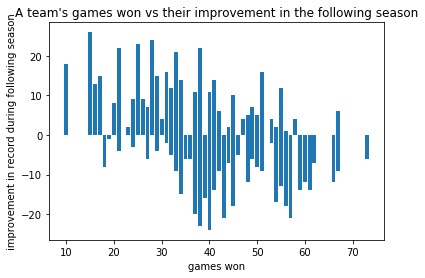

In [15]:
def diff(x):
  #helper func to find a teams improvement for each year
  diff_arr = []
  for i in range(0, len(x)-1):
    diff_arr += [x.iloc[i+1] - x.iloc[i]]
  return diff_arr + [0]

final_standings["improvement"] = final_standings[["gameWon", "teamAbbr"]].groupby("teamAbbr")[["gameWon"]].transform(diff).fillna(0)
final_standings["year"] = final_standings["stDate"].dt.year - 1

plt.bar(x=final_standings["gameWon"].iloc[0:-1], height=final_standings["improvement"].iloc[0:-1])
plt.title("A team's games won vs their improvement in the following season")
plt.xlabel("games won")
plt.ylabel("improvement in record during following season")

#Here our EDA graph shows us that teams that tended to do poorly one season often improved the next season. 
#And those that performed well tended to regress

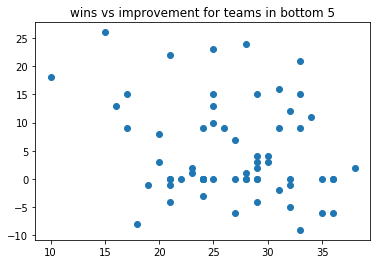

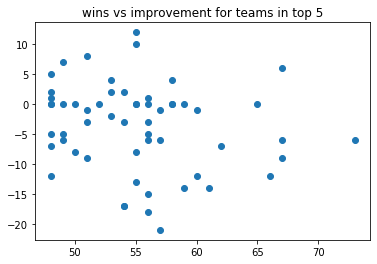

In [16]:
bottom_5 = final_standings[final_standings["rank"] > 10]
plt.title("wins vs improvement for teams in bottom 5")
plt.scatter(x=bottom_5["gameWon"].iloc[0:-1], y=bottom_5["improvement"].iloc[0:-1])
plt.show()

plt.title("wins vs improvement for teams in top 5")
top_5 = final_standings[final_standings["rank"] <5]
plt.scatter(x=top_5["gameWon"].iloc[0:-1], y=top_5["improvement"].iloc[0:-1])
plt.show()

# Here we are singling out data points for teams which ended in the bottom and top 5 of their conferences. 
# The relationship is very clear here that bad teams tend to improve. Our hypothesis is that this has something to do with players drafted/acquired

EDA: We wanted to look at a teams improvement from season to season; specifically with regards to how they performed the previous season. Do teams that perform poorly (and thus have a higher draft pick) do better the next season? What about teams that do well? In order to analyze this, we grouped the standings by team and created a function that finds a teams improvement in record in their following year. Then, we visualized the improvement in bar graphs.

# **Data Cleaning and Feature Engineering**

In [17]:
player_team = player_box.sort_values(by="gmDate").groupby(["playLNm", "playFNm"]).first()[["teamAbbr"]]
player_team["name"] = [tup[1] +" "+ tup[0] for tup in player_team.index]
player_team
#This table tells us what team a player was drafted by and played their first NBA game for

teamAbbr               name
playLNm   playFNm                              
Abrines   Alejandro      OKC  Alejandro Abrines
Acy       Quincy         TOR         Quincy Acy
Adams     Jordan         MEM       Jordan Adams
          Steven         OKC       Steven Adams
Adebayo   Edrice         MIA     Edrice Adebayo
...                      ...                ...
Zeller    Tyler          CLE       Tyler Zeller
Zimmerman Stephen        ORL  Stephen Zimmerman
Zipser    Paul           CHI        Paul Zipser
Zubac     Ivica          LAL        Ivica Zubac
Žižić     Ante           CLE         Ante Žižić

[941 rows x 2 columns]

In [18]:
final_standings[final_standings["teamAbbr"] == "ATL"]
final_standings = final_standings[["stDate", "teamAbbr", "gameWon", "improvement"]]
player_box["name"] = player_box["playFNm"] + " " + player_box["playLNm"]

In [19]:
player_box = player_box.merge(player_team, on="name")

In [20]:
def time_since_first(x):
  diff_arr = []
  for i in range(1, len(x)):
    diff_arr += [x.iloc[i] - x.iloc[0]]
  return [0] + diff_arr

player_box = player_box[player_box["teamAbbr_x"] == player_box["teamAbbr_y"]]
pg = player_box[["playMin", "name", "gmDate"]].groupby("name")
player_box["time_since_first_game"] = pg["gmDate"].transform(time_since_first).replace(0, timedelta(days=0))
player_box[player_box["time_since_first_game"] < timedelta(days=365)]
avg_min = player_box.groupby("name").mean()[["playMin"]]
player_box_full = avg_min.merge(player_box, right_on="name", left_index=True)
player_box_full = player_box_full[player_box_full["playMin_x"] >= 10][["playMin_x", "gmDate", "name", "teamAbbr_x"]]
# here we have filtered the table so that only box scores of a player's first season are accounted for. In addition
# in order to look at players who had significant roles on their team, we ignored players who played < 10 min/game in their first season 

In [21]:
player_box_full["year"] = player_box_full["gmDate"].dt.year
player_first_team = player_box_full.groupby("name").first()
player_first_team = player_first_team.rename(columns={"playMin_x":"playMin", "teamAbbr_x":"teamAbbr"})
player_first_team["name"] = [i for i in player_first_team.index]
player_first_team
# Here we have compiled a table that shows each significant player's first team 

,playMin,gmDate,teamAbbr,year,name
name,,,,,
A.J. Price,22.385965,2012-10-30,WAS,2012,A.J. Price
Aaron Brooks,20.869565,2012-10-31,SAC,2012,Aaron Brooks
Aaron Gordon,26.133080,2014-10-28,ORL,2014,Aaron Gordon
Aaron Gray,11.673913,2012-10-31,TOR,2012,Aaron Gray
Aaron Jackson,35.000000,2018-04-11,HOU,2018,Aaron Jackson
...,...,...,...,...,...
Xavier Rathan-Mayes,23.600000,2018-03-05,MEM,2018,Xavier Rathan-Mayes
Zach Collins,15.833333,2017-10-20,POR,2017,Zach Collins
Zach Randolph,31.035326,2012-10-31,MEM,2012,Zach Randolph


In [22]:
final_standings["year"] = final_standings["stDate"].dt.year - 1 #adding year

/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
player_team_improvement = player_first_team.merge(final_standings[["teamAbbr", "gameWon", "year", "improvement"]], on=["teamAbbr", "year"], how="left")


In [24]:
from_2012_has_ncaa = college[college["active_from"]>=2012]
from_2012_has_ncaa = from_2012_has_ncaa[from_2012_has_ncaa["NCAA_ppg"].notnull() &
                                        from_2012_has_ncaa["NCAA_fgpct"].notnull()
                                       ]
from_2012_has_ncaa = from_2012_has_ncaa[(from_2012_has_ncaa["NBA_g_played"]>=10)]
from_2012_has_ncaa = from_2012_has_ncaa[(from_2012_has_ncaa["NCAA_games"]>=10)]

college_careers = from_2012_has_ncaa[["name", "height", "college", "position", "weight", "NCAA_games", "NCAA_ppg", "NCAA_fgpct", "NBA_ppg", "NBA_fg%", "active_to", "active_from"]]


In [25]:
player_improvement = player_team_improvement.merge(college_careers, on="name", how="inner")

In [26]:
player_improvement = player_improvement[player_improvement["year"] < 2017]
player_improvement["improvement"] = [-1 if i < 0 else 1 for i in player_improvement["improvement"]]
player_improvement

,playMin,gmDate,teamAbbr,year,name,gameWon,improvement,height,college,position,weight,NCAA_games,NCAA_ppg,NCAA_fgpct,NBA_ppg,NBA_fg%,active_to,active_from
0,26.133080,2014-10-28,ORL,2014,Aaron Gordon,25.0,1,6-9,University of Arizona,F,220.0,38.0,12.4,0.495,11.4,0.451,2018,2015
2,13.596774,2016-03-17,PHO,2016,Alan Williams,24.0,1,6-8,"University of California, Santa Barbara",F-C,260.0,112.0,15.5,0.492,6.4,0.502,2018,2016
3,13.596774,2016-03-17,PHO,2016,Alan Williams,24.0,-1,6-8,"University of California, Santa Barbara",F-C,260.0,112.0,15.5,0.492,6.4,0.502,2018,2016
4,22.029412,2012-10-31,UTA,2012,Alec Burks,43.0,-1,6-6,University of Colorado,G,214.0,68.0,19.0,0.495,9.7,0.426,2018,2012
9,22.800885,2013-11-01,POR,2013,Allen Crabbe,54.0,-1,6-6,University of California,G-F,210.0,98.0,15.7,0.446,9.4,0.437,2018,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,15.715084,2015-11-10,MIN,2015,Tyus Jones,29.0,1,6-2,Duke University,G,195.0,39.0,11.8,0.417,4.4,0.422,2018,2016
270,12.333333,2016-10-26,MEM,2016,Wade Baldwin,43.0,-1,6-4,Vanderbilt University,G,202.0,68.0,11.6,0.431,3.6,0.361,2018,2017
273,22.775701,2015-10-28,SAC,2015,Willie Cauley-Stein,33.0,-1,7-0,University of Kentucky,F-C,240.0,105.0,8.0,0.593,9.2,0.522,2018,2016
274,10.923077,2015-12-04,BKN,2015,Willie Reed,21.0,-1,6-10,Saint Louis University,F-C,220.0,67.0,10.2,0.574,4.9,0.592,2018,2016


In [27]:
groupmeancollege = from_2012_has_ncaa.groupby("college").mean().sort_values("college", ascending=False)
groupmeancollege["college_value"] = groupmeancollege["NBA_ppg"] / groupmeancollege["NCAA_ppg"] 
groupmeancollege = groupmeancollege[["college_value"]]
# We are adding in a new feature, college_value, which takes the average PPG of their students in the NBA divided by the average NCAA PPG of their students. 
# This is supposed to represent how competitive the college's basketball program was 
final_player_improvement = groupmeancollege.merge(player_improvement, how="inner", left_index=True, right_on="college")
final_player_improvement
# this is the final dataset we will be using for model fitting and predicting. We will later extract the text columns

,college_value,playMin,gmDate,teamAbbr,year,name,gameWon,improvement,height,college,position,weight,NCAA_games,NCAA_ppg,NCAA_fgpct,NBA_ppg,NBA_fg%,active_to,active_from
234,0.179012,15.187500,2016-10-26,OKC,2016,Semaj Christon,47.0,1,6-3,Xavier University,G,190.0,64.0,16.2,0.462,2.9,0.345,2017,2017
42,0.346359,14.357143,2014-10-29,NY,2014,Cleanthony Early,17.0,1,6-8,Wichita State University,F,210.0,75.0,15.1,0.470,4.3,0.346,2016,2015
82,0.346359,16.053097,2016-11-09,TOR,2016,Fred VanVleet,51.0,1,6-0,Wichita State University,G,195.0,141.0,10.2,0.426,6.8,0.414,2018,2017
228,0.346359,15.345679,2016-10-25,NY,2016,Ron Baker,31.0,-1,6-4,Wichita State University,G,220.0,124.0,13.2,0.433,3.5,0.370,2018,2017
152,0.229008,10.468750,2012-12-07,CLE,2012,Kevin Jones,24.0,1,6-8,West Virginia University,F,251.0,139.0,13.1,0.494,3.0,0.402,2013,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0.976378,23.350000,2012-11-01,OKC,2012,Reggie Jackson,60.0,-1,6-3,Boston College,G,208.0,99.0,12.7,0.465,12.4,0.431,2018,2012
44,0.523427,10.600000,2014-10-29,BKN,2014,Cory Jefferson,38.0,-1,6-9,Baylor University,F,218.0,130.0,8.9,0.543,3.5,0.444,2016,2015
214,0.523427,11.762238,2012-11-02,OKC,2012,Perry Jones,60.0,-1,6-11,Baylor University,F,235.0,63.0,13.7,0.522,3.4,0.420,2015,2013
216,0.523427,11.222222,2012-11-07,TOR,2012,Quincy Acy,34.0,1,6-7,Baylor University,F,240.0,139.0,9.8,0.602,5.0,0.446,2018,2013


# **Model Fitting and Predicting**

In [28]:

train, test = train_test_split(final_player_improvement, test_size=0.1, random_state=42)
test=test.fillna(41)
train=train.fillna(41)
train[train["teamAbbr"] == "BOS"]
# fixing an edge case where boston celtics played 81 games instead of 82

,college_value,playMin,gmDate,teamAbbr,year,name,gameWon,improvement,height,college,position,weight,NCAA_games,NCAA_ppg,NCAA_fgpct,NBA_ppg,NBA_fg%,active_to,active_from
109,0.524183,23.648649,2016-10-26,BOS,2016,Jaylen Brown,53.0,1,6-7,University of California,F-G,225.0,34.0,14.6,0.431,10.2,0.461,2018,2017
215,0.293269,13.816000,2013-10-30,BOS,2013,Phil Pressey,25.0,1,5-11,University of Missouri,G,175.0,99.0,9.7,0.395,3.2,0.341,2016,2014
105,0.691257,24.868217,2012-10-30,BOS,2012,Jared Sullinger,41.0,1,6-9,Ohio State University,F,260.0,74.0,17.3,0.530,10.8,0.436,2017,2013
248,0.737557,18.886010,2015-10-28,BOS,2015,Terry Rozier,48.0,1,6-2,University of Louisville,G,190.0,73.0,12.0,0.408,7.2,0.379,2018,2016
185,0.391697,28.716475,2014-10-29,BOS,2014,Marcus Smart,40.0,1,6-4,Oklahoma State University,G,220.0,64.0,16.6,0.413,9.4,0.360,2018,2015
146,0.512500,20.683453,2013-10-30,BOS,2013,Kelly Olynyk,25.0,1,7-0,Gonzaga University,C-F,238.0,101.0,8.9,0.594,9.9,0.482,2018,2014


In [29]:
def convertHeight(x):
  ft, inch = x.split("-")
  return int(ft) * 12 + int(inch)

#helper func to convert height to inches integer

train["height"] = train["height"].map(convertHeight)
test["height"] = test["height"].map(convertHeight)
print("features: ", train.columns)

features:  Index(['college_value', 'playMin', 'gmDate', 'teamAbbr', 'year', 'name',
       'gameWon', 'improvement', 'height', 'college', 'position', 'weight',
       'NCAA_games', 'NCAA_ppg', 'NCAA_fgpct', 'NBA_ppg', 'NBA_fg%',
       'active_to', 'active_from'],
      dtype='object')


In [30]:
X_train, Y_train = train.drop(['gmDate', 'improvement', "teamAbbr", "name", "college", "position"], axis=1), np.array(train["improvement"])
X_test, Y_test = test.drop(['gmDate', 'improvement', "teamAbbr", "name", "college", "position"], axis=1), np.array(test["improvement"])
model = LinearRegression()
#Linear Regression
model.fit(X_train, Y_train)
training_accuracy = model.score(X_train, Y_train)
test_accuracy = model.score(X_test, Y_test)
print("LinearRegression Model")
print("Training Accuracy: ", training_accuracy)
print("Test Accuracy: ", test_accuracy)

LinearRegression Model
Training Accuracy:  0.21410418570577194
Test Accuracy:  0.13378911045465924


In [31]:
X_train, Y_train = train.drop(['gmDate', 'improvement', "teamAbbr", "name", "college", "position"], axis=1), np.array(train["improvement"])
X_test, Y_test = test.drop(['gmDate', 'improvement', "teamAbbr", "name", "college", "position"], axis=1), np.array(test["improvement"])
model = LogisticRegression(max_iter=10000)
#Logistic Regression
model.fit(X_train, Y_train)
training_accuracy = model.score(X_train, Y_train)
test_accuracy = model.score(X_test, Y_test)
print("LogisticRegression Model")
print("Training Accuracy: ", training_accuracy)
print("Test Accuracy: ", test_accuracy)

LogisticRegression Model
Training Accuracy:  0.723404255319149
Test Accuracy:  0.7619047619047619


In [32]:
#RANDOM FORESTS
from sklearn import ensemble 
rf_model = ensemble.RandomForestClassifier(n_estimators=20, random_state = 42)
rf_model = rf_model.fit(X_train, Y_train)
training_accuracy = rf_model.score(X_train, Y_train)
test_acc = rf_model.score(X_test, Y_test)
prediction = rf_model.predict(X_test)
train_prediction = rf_model.predict(X_train)

print("Random Forest MODEL")
print("Training Accuracy: ", training_accuracy)
print("Test Accuracy: ", test_acc)

Random Forest MODEL
Training Accuracy:  0.9627659574468085
Test Accuracy:  0.8095238095238095


# **Result Visualizations**

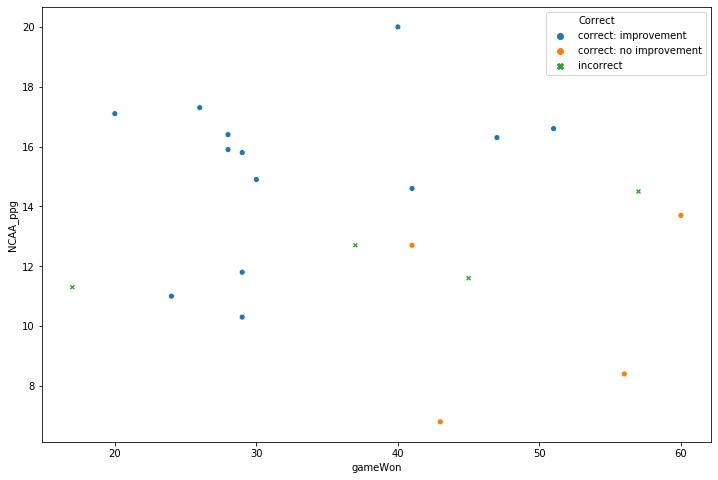

In [33]:
#
import seaborn as sns
import matplotlib.colors as mcolors

test_results = X_test
def quantifyResults(prediction, Y_test):
  res = []
  for x in range(0, len(prediction)):
    if prediction[x] == -1 and Y_test[x] == -1:
      res = res + ["correct: no improvement"]
    elif prediction[x] == 1 and Y_test[x] == 1:
      res = res + ["correct: improvement"]
    else:
      res = res + ["incorrect"]
  return res

res = quantifyResults(prediction, Y_test)
test_results["Correct"] = res
fig = plt.gcf()
fig.set_size_inches(12, 8)
markers = {"correct: no improvement": "o", "correct: improvement": "o", "incorrect": "X"}
sns.scatterplot(data = test_results, x="gameWon", y="NCAA_ppg", markers=markers, style="Correct", hue="Correct", hue_order=["correct: improvement", "correct: no improvement", "incorrect"])

# This visualization of our test results demonstrates how two of our more important features, NCAA_ppg and gameWon, provided a clean seperation of our data points.
# Our hypothesis was that players who scored a lot in college and played for a bad NBA team probably helped to improve that teams record (and the opposite vice versa)
# Here we see that our model correctly predicts a team to improve in that exact scenario (lots of points and low gameWon)

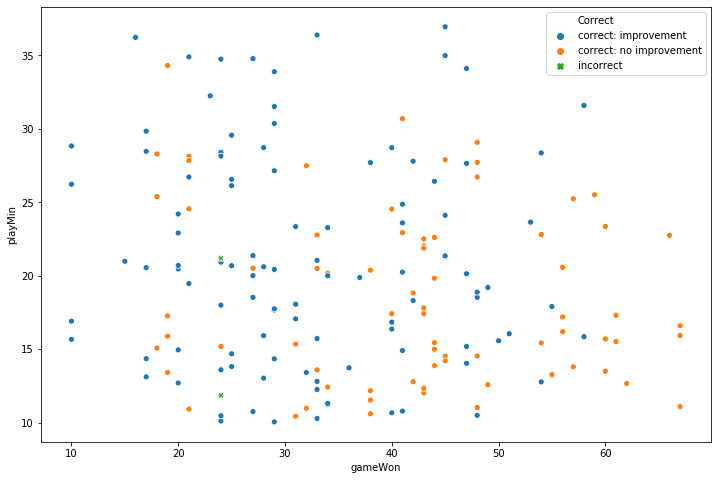

In [35]:
res = quantifyResults(train_prediction, Y_train)
test_results = X_train
test_results["Correct"] = res
fig = plt.gcf()
fig.set_size_inches(12, 8)

markers = {"correct: no improvement": "o", "correct: improvement": "o", "incorrect": "X"}
sns.scatterplot(data = test_results, x="gameWon", y="playMin", markers=markers, style="Correct", hue="Correct", hue_order=["correct: improvement", "correct: no improvement", "incorrect"])

# This is more of a fun visualization of our training set, specifically how minutes played and gamesWon affected our predictions. 
# While the relationship isn't as clear as above, it does show that we tended to correctly predict no improvement when a team won a lot of games 
# and drafted a player they did not give many minutes to. The opposite was true for bad teams that played their rookies lots of minutes.